Background & Motivation:

Water is the ultimate gift of nature to humanity and every living organism. Most of us have the luxury to lead our daily lives without feeling blunt of water scarcity but there are people in some parts of the world where they would have to walk several miles to have access to water. The situation worsens for them if this access, such as pumps, wells, or other water-points, also shuts down unexpectedly.

If a Machine Learning algorithm can predict which water point may fail in the immediate future, they can divert the maintenance resource towards that point with reasonable advance notice.

ProblemStatement: Your goal is to build an ML model(s) which trains on the given data, is appropriately validated, and finally predicts on the test data provided to you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("traindata_updated-1617172296397.csv")
df_test=pd.read_csv("testdataupdated-1617172320262.csv")
df.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [ ]:
df.describe()

,Id,Amount_of_water,Gps_height,Region_code,District_code,Population,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,37092.516384,329.781607,674.305460,15.224539,5.664382,179.780181,0.585640
std,21490.884249,3127.604462,698.062813,17.566722,9.670612,473.609701,0.492617
min,0.000000,0.000000,-63.000000,1.000000,0.000000,0.000000,0.000000
25%,18363.250000,0.000000,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37021.500000,0.000000,370.000000,12.000000,3.000000,25.000000,1.000000
75%,55685.250000,20.000000,1327.000000,17.000000,5.000000,211.000000,1.000000
max,74242.000000,350000.000000,2628.000000,99.000000,80.000000,30500.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpoint_type        44068 non-null  object 
 4   Basin_name             44068 non-null  object 
 5   Village                44068 non-null  object 
 6   Regionname             44068 non-null  object 
 7   Region_code            44068 non-null  int64  
 8   Wardname               44068 non-null  object 
 9   District_code          44068 non-null  int64  
 10  Population             44068 non-null  int64  
 11  Public_meeting         41543 non-null  object 
 12  Organization_funding   41468 non-null  object 
 13  Organization_surveyed  44068 non-null  object 
 14  Scheme_management      41138 non-null  object 
 15  Sc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f312caefd50>,
      dtype=object)

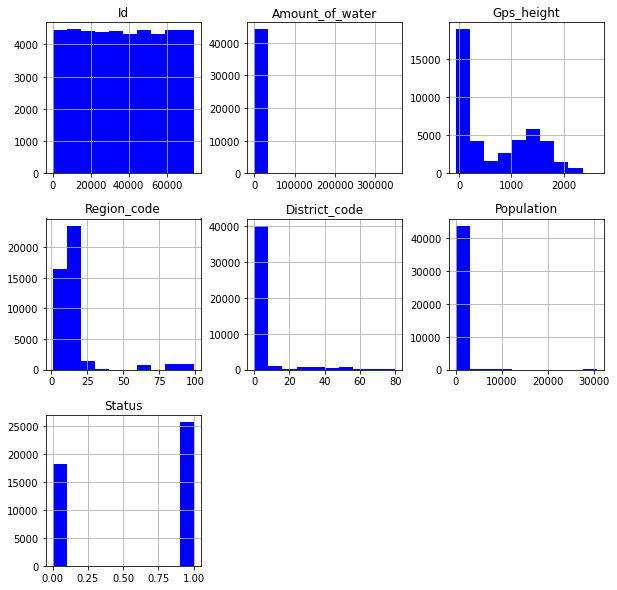

In [ ]:
df.hist(figsize=(10,10),color="b")

In [ ]:
df.nunique()

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [ ]:
df.shape

(44068, 34)

In [ ]:
numeric=df._get_numeric_data()
#numeric.info()
cat=df.drop(numeric,axis=1)
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Waterpoint_type        44068 non-null  object
 1   Basin_name             44068 non-null  object
 2   Village                44068 non-null  object
 3   Regionname             44068 non-null  object
 4   Wardname               44068 non-null  object
 5   Public_meeting         41543 non-null  object
 6   Organization_funding   41468 non-null  object
 7   Organization_surveyed  44068 non-null  object
 8   Scheme_management      41138 non-null  object
 9   SchemeName             23117 non-null  object
 10  Permit                 41841 non-null  object
 11  Company_installed      41465 non-null  object
 12  Management             44068 non-null  object
 13  Management_group       44068 non-null  object
 14  Extraction_type        44068 non-null  object
 15  Extraction_type_gro

In [ ]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Waterpoint_type        44068 non-null  object
 1   Basin_name             44068 non-null  object
 2   Village                44068 non-null  object
 3   Regionname             44068 non-null  object
 4   Wardname               44068 non-null  object
 5   Public_meeting         41543 non-null  object
 6   Organization_funding   41468 non-null  object
 7   Organization_surveyed  44068 non-null  object
 8   Scheme_management      41138 non-null  object
 9   SchemeName             23117 non-null  object
 10  Permit                 41841 non-null  object
 11  Company_installed      41465 non-null  object
 12  Management             44068 non-null  object
 13  Management_group       44068 non-null  object
 14  Extraction_type        44068 non-null  object
 15  Extraction_type_gro

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    df[i] = le.fit_transform(df[i])
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44068 entries, 0 to 44067
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     44068 non-null  int64  
 1   Amount_of_water        44068 non-null  float64
 2   Gps_height             44068 non-null  int64  
 3   Waterpoint_type        44068 non-null  int64  
 4   Basin_name             44068 non-null  int64  
 5   Village                44068 non-null  int64  
 6   Regionname             44068 non-null  int64  
 7   Region_code            44068 non-null  int64  
 8   Wardname               44068 non-null  int64  
 9   District_code          44068 non-null  int64  
 10  Population             44068 non-null  int64  
 11  Public_meeting         44068 non-null  int64  
 12  Organization_funding   44068 non-null  int64  
 13  Organization_surveyed  44068 non-null  int64  
 14  Scheme_management      44068 non-null  int64  
 15  Sc

In [ ]:
df.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,4,2,15081,15,15,1536,3,650,...,2,4,4,2,2,7,5,0,3,0
1,500.0,857,2,6,13964,16,10,889,5,600,...,1,6,2,2,2,6,4,1,1,0
2,0.0,0,1,0,15958,17,17,1958,3,0,...,2,6,2,2,2,3,0,0,1,0
3,0.0,0,6,4,3668,4,18,563,7,0,...,2,6,2,2,2,7,5,0,5,0
4,0.0,0,4,3,11925,17,14,2024,4,0,...,2,6,2,1,1,3,0,0,3,1


In [ ]:
df.isna().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [ ]:
#%time df.hist(figsize=(20,20),color='y')

In [ ]:
df.head()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,0.0,1555,4,2,15081,15,15,1536,3,650,...,2,4,4,2,2,7,5,0,3,0
1,500.0,857,2,6,13964,16,10,889,5,600,...,1,6,2,2,2,6,4,1,1,0
2,0.0,0,1,0,15958,17,17,1958,3,0,...,2,6,2,2,2,3,0,0,1,0
3,0.0,0,6,4,3668,4,18,563,7,0,...,2,6,2,2,2,7,5,0,5,0
4,0.0,0,4,3,11925,17,14,2024,4,0,...,2,6,2,1,1,3,0,0,3,1


In [ ]:
df.shape

(44068, 33)

In [ ]:
df=df.drop('Id',axis=1)
#df

In [ ]:
df.describe()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
count,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,...,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000,44068.000000
mean,329.781607,674.305460,2.590428,4.096805,8195.310112,9.844286,15.224539,1053.401198,5.664382,179.780181,...,2.861555,5.749319,2.270128,1.311065,1.311065,6.036603,3.945743,0.224721,2.071140,0.585640
std,3127.604462,698.062813,1.787828,2.487516,4731.647410,5.966426,17.566722,593.996669,9.670612,473.609701,...,1.842102,0.908576,0.792383,0.808536,0.808536,2.064771,2.217051,0.429144,1.382881,0.492617
min,0.000000,-63.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,4267.000000,4.000000,5.000000,548.000000,2.000000,0.000000,...,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000,0.000000
50%,0.000000,370.000000,2.000000,4.000000,8154.000000,10.000000,12.000000,1038.000000,3.000000,25.000000,...,2.000000,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,1.000000,1.000000
75%,20.000000,1327.000000,4.000000,6.000000,12077.250000,15.000000,17.000000,1569.250000,5.000000,211.000000,...,5.000000,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,0.000000,3.000000,1.000000
max,350000.000000,2628.000000,6.000000,8.000000,16470.000000,20.000000,99.000000,2086.000000,80.000000,30500.000000,...,6.000000,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,2.000000,5.000000,1.000000


In [ ]:
#df=df.dropna(axis=0)
df.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

In [ ]:
#df.hist(figsize=(15,15),color='b')

In [ ]:
df.shape

(44068, 34)

In [ ]:
 #df=df.apply(lambda x: np.log(x))
 df

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,4,2,15081,15,15,1536,3,...,2,4,4,2,2,7,5,0,3,0
1,21324,500.0,857,2,6,13964,16,10,889,5,...,1,6,2,2,2,6,4,1,1,0
2,74,0.0,0,1,0,15958,17,17,1958,3,...,2,6,2,2,2,3,0,0,1,0
3,74038,0.0,0,6,4,3668,4,18,563,7,...,2,6,2,2,2,7,5,0,5,0
4,29929,0.0,0,4,3,11925,17,14,2024,4,...,2,6,2,1,1,3,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,33555,0.0,0,5,4,5993,4,18,471,2,...,2,6,2,2,2,8,6,0,4,1
44064,17775,0.0,618,4,7,63,16,10,1178,1,...,5,6,2,1,1,3,0,0,3,0
44065,34200,0.0,1582,1,6,16276,3,11,995,4,...,2,6,2,1,1,6,4,1,1,0
44066,17012,200.0,629,1,5,2105,6,3,277,3,...,1,6,2,1,1,8,6,0,1,1


In [ ]:
df['Status'].value_counts(normalize=True)

1    0.58564
0    0.41436
Name: Status, dtype: float64

In [ ]:
x=df.drop(['Status'],axis=1)
y=df['Status']
#data_new['failure'].value_counts(normalize=True)
print(x.shape)
print(y.shape)
x.head()

(44068, 32)
(44068,)


,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,0.0,1555,4,2,15081,15,15,1536,3,650,...,0,2,4,4,2,2,7,5,0,3
1,500.0,857,2,6,13964,16,10,889,5,600,...,3,1,6,2,2,2,6,4,1,1
2,0.0,0,1,0,15958,17,17,1958,3,0,...,0,2,6,2,2,2,3,0,0,1
3,0.0,0,6,4,3668,4,18,563,7,0,...,0,2,6,2,2,2,7,5,0,5
4,0.0,0,4,3,11925,17,14,2024,4,0,...,0,2,6,2,1,1,3,0,0,3


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)
X_std

array([[-0.10544343,  1.26164081,  0.78843574, ...,  0.47552755,
        -0.52365479,  0.67169222],
       [ 0.05442514,  0.26171945, -0.33025274, ...,  0.0244729 ,
         1.80659053, -0.77458011],
       [-0.10544343, -0.9659777 , -0.88959698, ..., -1.7797457 ,
        -0.52365479, -0.77458011],
       ...,
       [-0.10544343,  1.30031972, -0.88959698, ...,  0.0244729 ,
         1.80659053, -0.77458011],
       [-0.041496  , -0.06490243, -0.88959698, ...,  0.9265822 ,
        -0.52365479, -0.77458011],
       [-0.10544343,  1.20004107,  0.78843574, ..., -1.7797457 ,
        -0.52365479,  0.67169222]])

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA().fit(X_std)
pca = PCA(n_components = 0.95)
pca.fit(x_std)
reduced = pca.transform(x_std)

NameError: ignored

In [ ]:
#In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace,
#we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; 
#those are the ones can be dropped.

print("Eigen values:",pca.explained_variance_)
print("Eigen vectors:",pca.components_)

NameError: ignored

Text(0, 0.5, 'Cumulative explained variance')

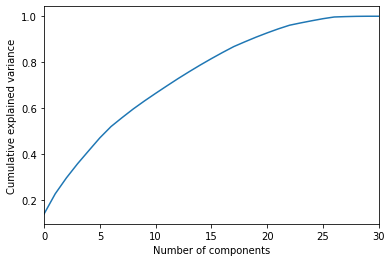

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,5)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=8)
x = sklearn_pca.fit_transform(X_std)
x.shape

(44068, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30847, 8)
(13221, 8)
(30847,)
(13221,)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
%time model.fit(x_train,y_train)

CPU times: user 61.6 ms, sys: 39 ms, total: 101 ms
Wall time: 55.3 ms


LogisticRegression()

In [ ]:
testpreds=model.predict(x_test)
trainpreds=model.predict(x_train)
print('Train',trainpreds)
#print("test ",testpreds)

Train [1 1 1 ... 1 1 1]


In [ ]:
p=pd.DataFrame(trainpreds)
p=p[0].value_counts(normalize=True)
p

1    0.680617
0    0.319383
Name: 0, dtype: float64

In [ ]:
p=pd.DataFrame(testpreds)
p=p[0].value_counts(normalize=True)
p

1    0.509039
0    0.490961
Name: 0, dtype: float64

In [ ]:
from sklearn.metrics import  confusion_matrix,accuracy_score,recall_score,precision_score
print(confusion_matrix (y_train,trainpreds))   # accurate the predict 
print(confusion_matrix (y_test,testpreds))
print("train accuarcy:",accuracy_score(y_train,trainpreds))
print("test accuarcy:",accuracy_score(y_test,testpreds))
print("train recall:",recall_score(y_train,trainpreds))
print("test recall:",recall_score(y_test,testpreds))
print("train precision:",precision_score(y_train,trainpreds))
print("test precision:",precision_score(y_test,testpreds))

[[ 6031  6672]
 [ 3821 14323]]
[[2662 2895]
 [1664 6000]]
train accuarcy: 0.6598372613220086
test accuarcy: 0.6551698056122834
train recall: 0.7894069664902998
test recall: 0.7828810020876826
train precision: 0.6822100500119076
test precision: 0.6745362563237775


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski')
k.fit(x_train,y_train)
testpreds_k=k.predict(x_test)
trainpreds_k=k.predict(x_train)

In [ ]:
p=pd.DataFrame(trainpreds_k)
p=p[0].value_counts(normalize=True)
p

1    0.597951
0    0.402049
Name: 0, dtype: float64

In [ ]:
p=pd.DataFrame(testpreds_k)
p=p[0].value_counts(normalize=True)
p

1    0.540352
0    0.459648
Name: 0, dtype: float64

In [ ]:
from sklearn.metrics import  confusion_matrix,accuracy_score,recall_score,precision_score
print(confusion_matrix (y_train,trainpreds_k))   # accurate the predict 
print(confusion_matrix (y_test,testpreds_k))
print("train accuarcy:",accuracy_score(y_train,trainpreds_k))
print("test accuarcy:",accuracy_score(y_test,testpreds_k))

[[11382  1321]
 [ 2698 15446]]
[[4534 1023]
 [1543 6121]]
train accuarcy: 0.8697118034168638
test accuarcy: 0.805914832463505


In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train,y_train)
testpreds_d=d.predict(x_test)
trainpreds_d=d.predict(x_train)

In [ ]:
p=pd.DataFrame(trainpreds_d)
p=p[0].value_counts(normalize=True)
p

1    0.586864
0    0.413136
Name: 0, dtype: float64

In [ ]:
from sklearn.metrics import  confusion_matrix,accuracy_score,recall_score,precision_score
print(confusion_matrix (y_train,trainpreds_d))   # accurate the predict 
print(confusion_matrix (y_test,testpreds_d))
print("train accuarcy:",accuracy_score(y_train,trainpreds_d))
print("test accuarcy:",accuracy_score(y_test,testpreds_d))

[[12682    21]
 [   62 18082]]
[[4751  806]
 [ 872 6792]]
train accuarcy: 0.9973093007423737
test accuarcy: 0.873080704939112


In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
#testpreds_r=r.predict(x_test)
trainpreds_r=r.predict(x_train)

In [ ]:
d.score(x_train,y_train)

0.9973093007423737

In [ ]:
testpreds_d

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
r.fit(x_train,y_train)
testpreds_r=r.predict(x_test)
trainpreds_r=r.predict(x_train)

In [ ]:
p=pd.DataFrame(trainpreds_r)
p=p[0].value_counts(normalize=True)
p

1    0.58842
0    0.41158
Name: 0, dtype: float64

In [ ]:
from sklearn.metrics import  confusion_matrix,accuracy_score,recall_score,precision_score
print(confusion_matrix (y_train,trainpreds_r))   # accurate the predict 
print(confusion_matrix (y_test,testpreds_r))
print("train accuarcy:",accuracy_score(y_train,trainpreds_r))
print("test accuarcy:",accuracy_score(y_test,testpreds_r))
print("train recall:",recall_score(y_train,trainpreds_r))
print("test recall:",recall_score(y_test,testpreds_r))
print("train precision:",precision_score(y_train,trainpreds_r))
print("test precision:",precision_score(y_test,testpreds_r))

[[12661    42]
 [   41 18103]]
[[4991  566]
 [ 770 6894]]
train accuarcy: 0.9973093007423737
test accuarcy: 0.8989486423114742
train recall: 0.9977402998236331
test recall: 0.8995302713987474
train precision: 0.9976853127583356
test precision: 0.9241286863270778


In [ ]:
trainpreds_d.shape

(30847,)

In [ ]:
df_test

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,0.0,1018,3,1,4571,16,10,769,4,0,...,5,3,6,2,0,0,7,5,0,2
1,0.0,356,3,7,3829,16,10,1372,1,1,...,0,2,6,2,1,1,3,0,0,2
2,500.0,265,3,6,3588,11,5,540,3,600,...,3,1,6,2,2,2,7,5,0,2
3,0.0,1203,2,4,2658,9,20,1524,6,200,...,6,6,6,2,1,1,2,4,1,1
4,0.0,0,1,1,2917,10,12,352,3,0,...,3,1,6,2,1,1,8,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,0.0,0,1,0,3209,2,1,23,1,0,...,4,5,6,2,1,1,3,0,0,1
11011,0.0,1408,1,1,3680,3,11,787,5,0,...,0,2,6,2,1,1,8,6,0,1
11012,0.0,0,1,6,2791,10,12,337,2,0,...,5,3,6,2,1,1,6,4,1,1
11013,0.0,0,1,3,1317,19,14,306,1,0,...,0,2,6,2,1,1,0,1,1,1


In [ ]:
df_test.describe()

,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,Population,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
count,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,...,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000,11015.000000
mean,288.939537,660.207263,2.197640,4.106491,3338.112392,9.868997,15.529460,947.927463,5.832410,182.313572,...,2.352610,2.908488,5.761235,2.284067,1.304585,1.304585,6.062279,3.960145,0.217885,1.668997
std,2804.815011,689.647957,1.352477,2.484491,1944.042476,5.974204,18.129926,534.443193,10.026108,477.392955,...,2.294514,1.852118,0.884159,0.804369,0.814406,0.814406,2.037850,2.212464,0.424538,0.972902
min,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,1697.500000,4.000000,5.000000,498.000000,2.000000,0.000000,...,0.000000,2.000000,6.000000,2.000000,1.000000,1.000000,5.000000,3.000000,0.000000,1.000000
50%,0.000000,361.000000,2.000000,4.000000,3320.000000,10.000000,12.000000,936.000000,3.000000,25.000000,...,2.000000,2.000000,6.000000,2.000000,1.000000,1.000000,7.000000,5.000000,0.000000,1.000000
75%,20.000000,1317.000000,3.000000,6.000000,4944.000000,15.000000,17.000000,1409.000000,5.000000,209.500000,...,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,8.000000,6.000000,0.000000,2.000000
max,200000.000000,2569.000000,5.000000,8.000000,6725.000000,20.000000,99.000000,1878.000000,80.000000,11463.000000,...,6.000000,6.000000,7.000000,5.000000,4.000000,4.000000,9.000000,6.000000,2.000000,4.000000


In [ ]:
df_test.isnull().sum()

Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

In [ ]:
num=df_test._get_numeric_data()
numeric.head()
cat_test=df_test.drop(num,axis=1)

In [ ]:
cat_test.dtypes

Waterpoint_type          object
Basin_name               object
Village                  object
Regionname               object
Wardname                 object
Public_meeting           object
Organization_funding     object
Organization_surveyed    object
Scheme_management        object
SchemeName               object
Permit                   object
Company_installed        object
Management               object
Management_group         object
Extraction_type          object
Extraction_type_group    object
Extraction_type_class    object
Payment                  object
Payment_type             object
Water_quality            object
Quality_group            object
Quantity                 object
Quantity_group           object
Source                   object
Source_type              object
Source_class             object
Waterpoint_type_group    object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat_test:
    df_test[i] = le.fit_transform(df_test[i])
print (df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int64  
 1   Amount_of_water        11015 non-null  float64
 2   Gps_height             11015 non-null  int64  
 3   Waterpoint_type        11015 non-null  int64  
 4   Basin_name             11015 non-null  int64  
 5   Village                11015 non-null  int64  
 6   Regionname             11015 non-null  int64  
 7   Region_code            11015 non-null  int64  
 8   Wardname               11015 non-null  int64  
 9   District_code          11015 non-null  int64  
 10  Population             11015 non-null  int64  
 11  Public_meeting         11015 non-null  int64  
 12  Organization_funding   11015 non-null  int64  
 13  Organization_surveyed  11015 non-null  int64  
 14  Scheme_management      11015 non-null  int64  
 15  Sc

In [ ]:
df_test

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,3,1,4571,16,10,769,4,...,5,3,6,2,0,0,7,5,0,2
1,34980,0.0,356,3,7,3829,16,10,1372,1,...,0,2,6,2,1,1,3,0,0,2
2,54744,500.0,265,3,6,3588,11,5,540,3,...,3,1,6,2,2,2,7,5,0,2
3,20884,0.0,1203,2,4,2658,9,20,1524,6,...,6,6,6,2,1,1,2,4,1,1
4,42440,0.0,0,1,1,2917,10,12,352,3,...,3,1,6,2,1,1,8,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11010,50818,0.0,0,1,0,3209,2,1,23,1,...,4,5,6,2,1,1,3,0,0,1
11011,58478,0.0,1408,1,1,3680,3,11,787,5,...,0,2,6,2,1,1,8,6,0,1
11012,51919,0.0,0,1,6,2791,10,12,337,2,...,5,3,6,2,1,1,6,4,1,1
11013,4475,0.0,0,1,3,1317,19,14,306,1,...,0,2,6,2,1,1,0,1,1,1


In [ ]:
df_test.shape

(11015, 33)

In [ ]:
df_test.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

In [ ]:
df_test = df_test.drop('Id',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std_test = StandardScaler().fit_transform(df_test)
X_std_test

array([[-0.10302022,  0.51882845,  0.59327954, ...,  0.4700198 ,
        -0.51325164,  0.34023814],
       [-0.10302022, -0.44112517,  0.59327954, ..., -1.79000642,
        -0.51325164,  0.34023814],
       [ 0.07525275, -0.57308254,  0.59327954, ...,  0.4700198 ,
        -0.51325164,  0.34023814],
       ...,
       [-0.10302022, -0.95735401, -0.88555597, ...,  0.01801455,
         1.84235952, -0.68766179],
       [-0.10302022, -0.95735401, -0.88555597, ..., -1.33800118,
         1.84235952, -0.68766179],
       [-0.10302022, -0.61948513,  0.59327954, ...,  0.4700198 ,
        -0.51325164,  0.34023814]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std_test)

Text(0, 0.5, 'Cumulative explained variance')

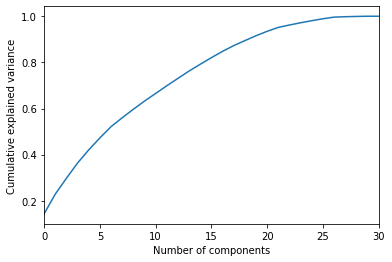

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,30,5)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=8)
x = sklearn_pca.fit_transform(X_std)
x.shape

(11015, 8)

In [ ]:
pred=model.predict(x)
print(trainpreds)
print(pred)

[1 1 1 ... 1 1 1]
[0 1 1 ... 1 0 1]


In [ ]:
t=pd.DataFrame(pred)
print(t[0].value_counts(normalize=True))
t

1    0.684249
0    0.315751
Name: 0, dtype: float64


,0
0,0
1,1
2,1
3,0
4,1
...,...
11010,0
11011,1
11012,1
11013,0


In [ ]:
pred_r=r.predict(x)
#pred_r=pd.DataFrame(pred_r)
#print(pred_r[0].value_counts(normalize=True))
pred_r

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
pred_d=d.predict(x)
pred_d=pd.DataFrame(pred_d)
print(pred_d[0].value_counts(normalize=True))
pred_d

1    0.553336
0    0.446664
Name: 0, dtype: float64


,0
0,0
1,0
2,1
3,0
4,0
...,...
11010,0
11011,1
11012,1
11013,1


In [ ]:
pred_k=k.predict(df_test)
pred_k=pd.DataFrame(pred_k)
print(pred_k[0].value_counts(normalize=True))
pred_k


1    0.85547
0    0.14453
Name: 0, dtype: float64


,0
0,1
1,1
2,1
3,1
4,1
...,...
11010,0
11011,1
11012,1
11013,1


In [ ]:
#submission = pd.DataFrame({"BraTS21ID": ids, "MGMT_value": y_pred}) 
#submission.to_csv("submission.csv", index=False)

In [ ]:
sub1=pd.DataFrame({"id":df_test['Id'].values,"predicted_values":pred_r})

sub1.to_csv("sub.csv",index=False)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder()
ohe_X = ohe.fit_transform(X) #fiting the data & transforming the data
ohe_X = pd.DataFrame(ohe_X.toarray()) #convert sparse matrix to dataframe